# Convolutional Neural Network

A Convolutional Neural Network (CNN) is a special type of deep learning model designed to automatically and adaptively learn features from data like images, signals, or video using a mathematical operation called convolution.





### 1. What is Convolutional?
The term **convolutional** comes from mathematics **convolution** <br><br>
Convolution is a way to combine the two informations such as in the CNN we combine the input feature (image) and the kernel information.
### 2. Why we use the Convolution?

To detect features like edges, corners, shapes in the image.

To reduce the number of parameters.

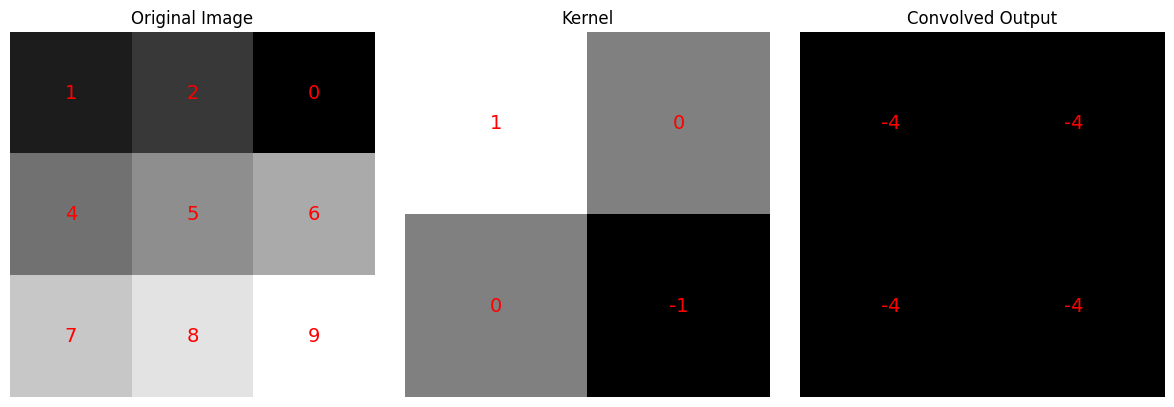

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input image (3x3)
image = np.array([
    [1, 2, 0],
    [4, 5, 6],
    [7, 8, 9]
])

# Kernel/filter (2x2)
kernel = np.array([
    [1, 0],
    [0, -1]
])

# Get dimensions
image_height, image_width = image.shape
kernel_height, kernel_width = kernel.shape

# Output feature map size
output_height = image_height - kernel_height + 1
output_width = image_width - kernel_width + 1

# Initialize output
output = np.zeros((output_height, output_width))

# Perform convolution
for i in range(output_height):
    for j in range(output_width):
        region = image[i:i+kernel_height, j:j+kernel_width]
        output[i, j] = np.sum(region * kernel)

# 📊 Function to plot matrix with values
def plot_with_numbers(ax, data, title):
    ax.imshow(data, cmap='gray', vmin=np.min(data), vmax=np.max(data))
    for (i, j), val in np.ndenumerate(data):
        ax.text(j, i, f'{val:.0f}', ha='center', va='center', color='red', fontsize=14)
    ax.set_title(title)
    ax.axis('off')

# 🖼 Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

plot_with_numbers(axs[0], image, "Original Image")
plot_with_numbers(axs[1], kernel, "Kernel")
plot_with_numbers(axs[2], output, "Convolved Output")

plt.tight_layout()
plt.show()


### Layers used in the CNN
There are mainly three layers that can help dealing with images:

Convolutional layer

Max/Average pooling layer

BatchNorm layer

Dropout layer

### 1. Convolutional Layer

Let's say given a image of 14 x 14 pixels = 196 features like this. Each data point is an array of numbers describing how dark each pixel is, where value range from 0 to 255. These values can be normalized ranging from 0 to 1. For example, for the following digit (the digit 1), we could have:


#### Image Shape:

Shape of a image **(input channels, image height, image width)**
1. Grayscale: (1, 14, 14)
2. RBG: (3, 14, 14)
3. CMYK: (4, 14, 14)

#### If we have lots of Image : shape of a image **(batch size,input channels, image height, image width)**

If I define batch size as 500 (out of many more images I have), my input is (500, 4, 14, 14)


Matrix for diagonal line:

255   0   0   0   0   0   0   0   0   0   0   0   0   0
  0 255   0   0   0   0   0   0   0   0   0   0   0   0
  0   0 255   0   0   0   0   0   0   0   0   0   0   0
  0   0   0 255   0   0   0   0   0   0   0   0   0   0
  0   0   0   0 255   0   0   0   0   0   0   0   0   0
  0   0   0   0   0 255   0   0   0   0   0   0   0   0
  0   0   0   0   0   0 255   0   0   0   0   0   0   0
  0   0   0   0   0   0   0 255   0   0   0   0   0   0
  0   0   0   0   0   0   0   0 255   0   0   0   0   0
  0   0   0   0   0   0   0   0   0 255   0   0   0   0
  0   0   0   0   0   0   0   0   0   0 255   0   0   0
  0   0   0   0   0   0   0   0   0   0   0 255   0   0
  0   0   0   0   0   0   0   0   0   0   0   0 255   0
  0   0   0   0   0   0   0   0   0   0   0   0   0 255


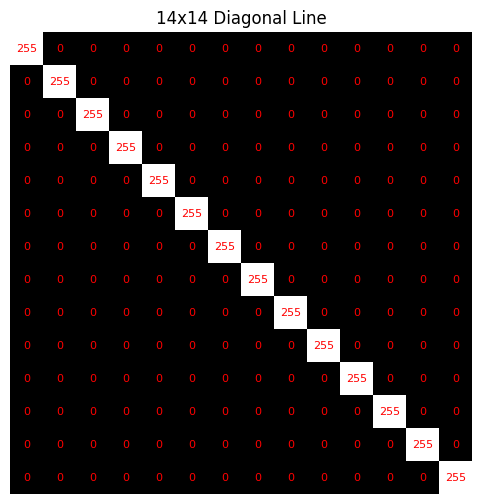

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_line_image(size=14, line_type='horizontal'):
    image = np.zeros((size, size), dtype=np.uint8)

    if line_type == 'horizontal':
        # Draw horizontal line in the middle row
        image[size//2, :] = 255

    elif line_type == 'vertical':
        # Draw vertical line in the middle column
        image[:, size//2] = 255

    elif line_type == 'diagonal':
        # Draw diagonal line from top-left to bottom-right
        for i in range(size):
            image[i, i] = 255
    else:
        raise ValueError("line_type must be 'horizontal', 'vertical', or 'diagonal'")

    return image

def print_matrix(mat):
    for row in mat:
        print(' '.join(f'{val:3d}' for val in row))

def visualize_matrix(mat, title="Image with Line"):
    plt.figure(figsize=(6,6))
    plt.imshow(mat, cmap='gray', vmin=0, vmax=255)
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            plt.text(j, i, str(mat[i,j]), ha='center', va='center', color='red', fontsize=8)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage:
line_type = 'diagonal'  # change to 'vertical' or 'diagonal' as needed
img = create_line_image(line_type=line_type)

print(f"Matrix for {line_type} line:\n")
print_matrix(img)

visualize_matrix(img, title=f"14x14 {line_type.capitalize()} Line")


### Kernel
A kernel is a small matrix of numbers (like 3×3, 5×5) used in convolution operations.

It “slides” over the input image (or previous layer’s feature map).

At each position, it performs element-wise multiplication and sums up the result — this extracts specific features (like edges, textures).

Kernels are learned during training — the network adjusts their values (weights) to better detect useful features.

<br><br>

### What is a Weight?
Weights are the parameters the network learns during training.

In CNNs, the kernel elements themselves are weights.

Each number in the kernel matrix is a weight that adjusts how strongly that pixel in the patch contributes to the output.

More generally, weights exist in all layers (fully connected, convolutional, etc.).


<br><br><br>
So:

Kernel = Small matrix of weights used for convolution.

Weights = All trainable parameters in the network, including kernel values.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


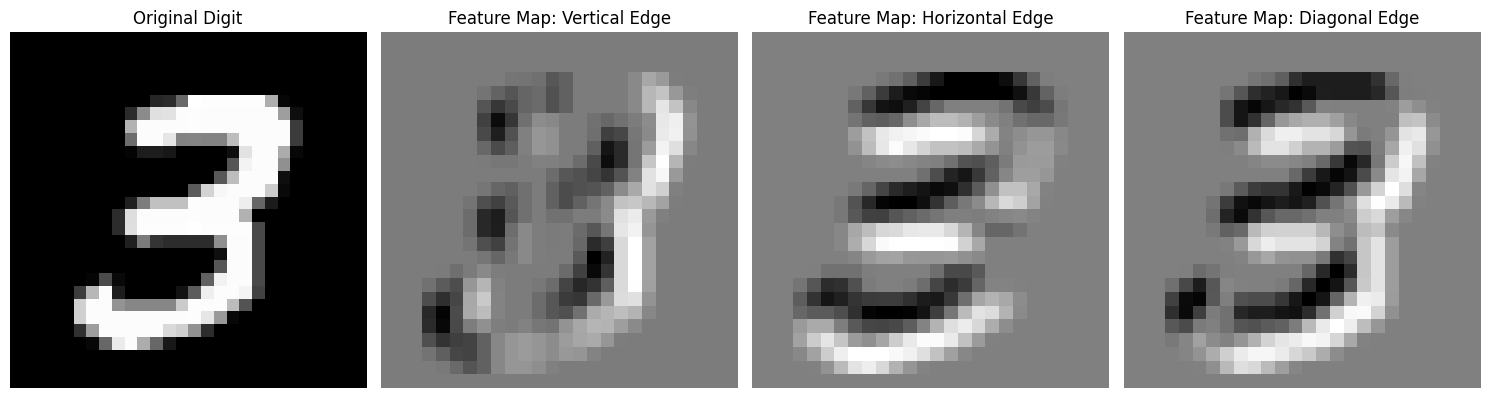

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset (only for demonstration, just one image)
(train_images, train_labels), _ = mnist.load_data()

# Pick one image (e.g., digit '7')
digit = train_images[7]

# Normalize image
digit = digit / 255.0

# Define some filters (kernels)
filters = {
    'Vertical Edge': np.array([[1, 0, -1],
                               [1, 0, -1],
                               [1, 0, -1]]),

    'Horizontal Edge': np.array([[1, 1, 1],
                                 [0, 0, 0],
                                 [-1, -1, -1]]),

    'Diagonal Edge': np.array([[2, 1, 0],
                              [1, 0, -1],
                              [0, -1, -2]])
}

def convolve2d(image, kernel):
    i_h, i_w = image.shape
    k_h, k_w = kernel.shape
    o_h = i_h - k_h + 1
    o_w = i_w - k_w + 1
    output = np.zeros((o_h, o_w))
    for i in range(o_h):
        for j in range(o_w):
            region = image[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel)
    return output

def plot_with_numbers(ax, data, title, cmap='gray'):
    ax.imshow(data, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')

# Compute feature maps
feature_maps = {name: convolve2d(digit, kernel) for name, kernel in filters.items()}

# Plot original digit and feature maps
fig, axs = plt.subplots(1, len(feature_maps)+1, figsize=(15, 5))
plot_with_numbers(axs[0], digit, "Original Digit")

for ax, (name, fmap) in zip(axs[1:], feature_maps.items()):
    plot_with_numbers(ax, fmap, f"Feature Map: {name}")

plt.tight_layout()
plt.show()


### Padding

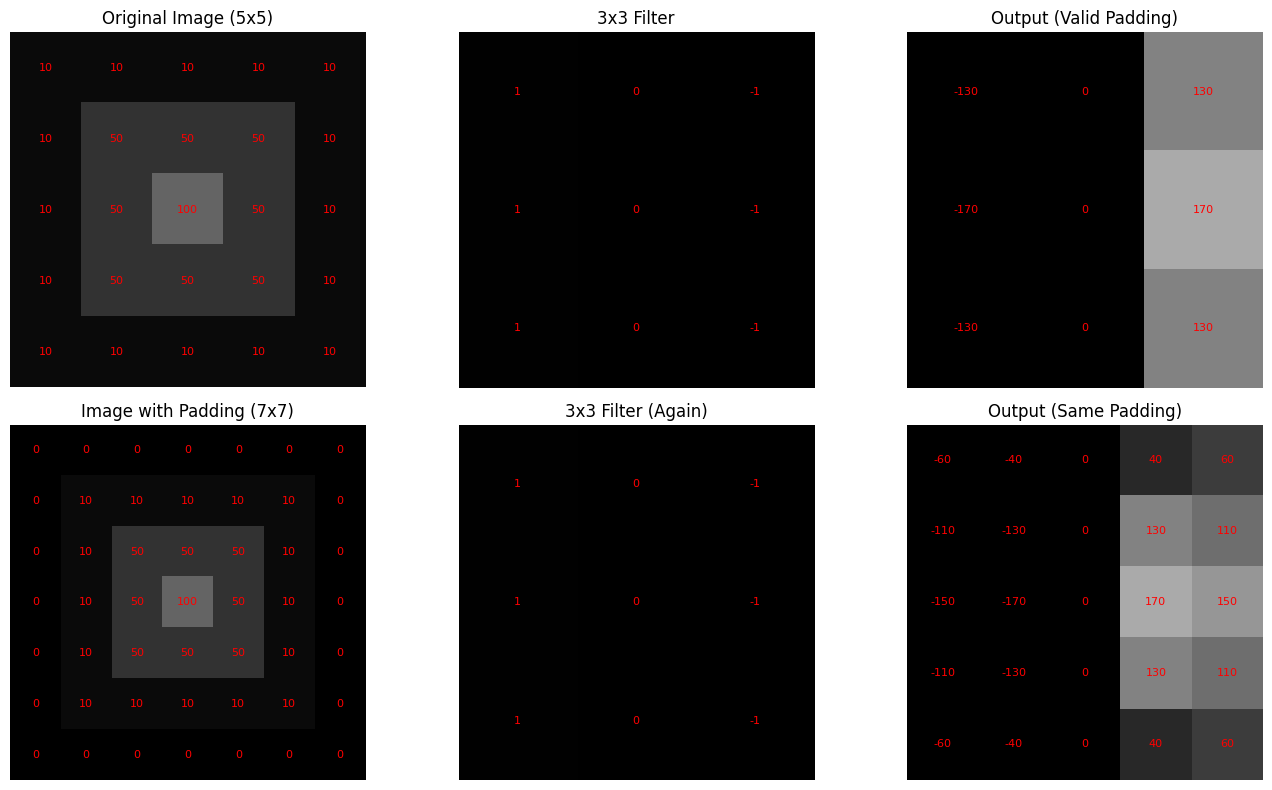

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convolve2d(image, kernel, padding=0, stride=1):
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    i_h, i_w = image.shape
    k_h, k_w = kernel.shape

    o_h = (i_h - k_h) // stride + 1
    o_w = (i_w - k_w) // stride + 1

    output = np.zeros((o_h, o_w))

    for i in range(0, o_h):
        for j in range(0, o_w):
            region = image[i*stride:i*stride+k_h, j*stride:j*stride+k_w]
            output[i, j] = np.sum(region * kernel)

    return image, output

def plot_matrix(ax, mat, title):
    ax.imshow(mat, cmap='gray', vmin=0, vmax=255)
    for (i, j), val in np.ndenumerate(mat):
        ax.text(j, i, f'{int(val)}', ha='center', va='center', color='red', fontsize=8)
    ax.set_title(title)
    ax.axis('off')

# 1️⃣ Create a 5x5 sample image
image = np.array([
    [10, 10, 10, 10, 10],
    [10, 50, 50, 50, 10],
    [10, 50, 100, 50, 10],
    [10, 50, 50, 50, 10],
    [10, 10, 10, 10, 10]
], dtype=np.uint8)

# 2️⃣ Define a 3x3 filter (e.g., average filter)
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# 3️⃣ Convolve without padding (valid)
unpadded_img, output_valid = convolve2d(image, kernel, padding=0)

# 4️⃣ Convolve with padding (same)
padded_img, output_same = convolve2d(image, kernel, padding=1)

# 5️⃣ Plot results
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

plot_matrix(axs[0, 0], image, "Original Image (5x5)")
plot_matrix(axs[0, 1], kernel, "3x3 Filter")
plot_matrix(axs[0, 2], output_valid, "Output (Valid Padding)")

plot_matrix(axs[1, 0], padded_img, "Image with Padding (7x7)")
plot_matrix(axs[1, 1], kernel, "3x3 Filter (Again)")
plot_matrix(axs[1, 2], output_same, "Output (Same Padding)")

plt.tight_layout()
plt.show()


### Stride

How many step we should take to slide our filter?

Small steps meaning detail information

Bigger steps meaning reduce the features size thus reduce the computational time


<br><br>

The formula to be used to measure the padding value to get the spatial size of the input and output volume to be the same with stride 1 is:

Formula = $\frac{K-1}{2}$

where, K is the kernel size



In [ ]:
# Display the stride animation inline in the notebook instead of saving
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Stride Animation (Stride = 1)")
im = ax.imshow(image_padded, cmap='gray', vmin=0, vmax=255)
rect = plt.Rectangle((0, 0), 3, 3, edgecolor='red', facecolor='none', lw=2)
ax.add_patch(rect)

def update(frame):
    i, j = frame
    rect.set_xy((j, i))
    return im, rect

ani = animation.FuncAnimation(fig, update, frames=frames, interval=600, blit=True, repeat=True)
plt.close(fig)

HTML(ani.to_jshtml())


/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


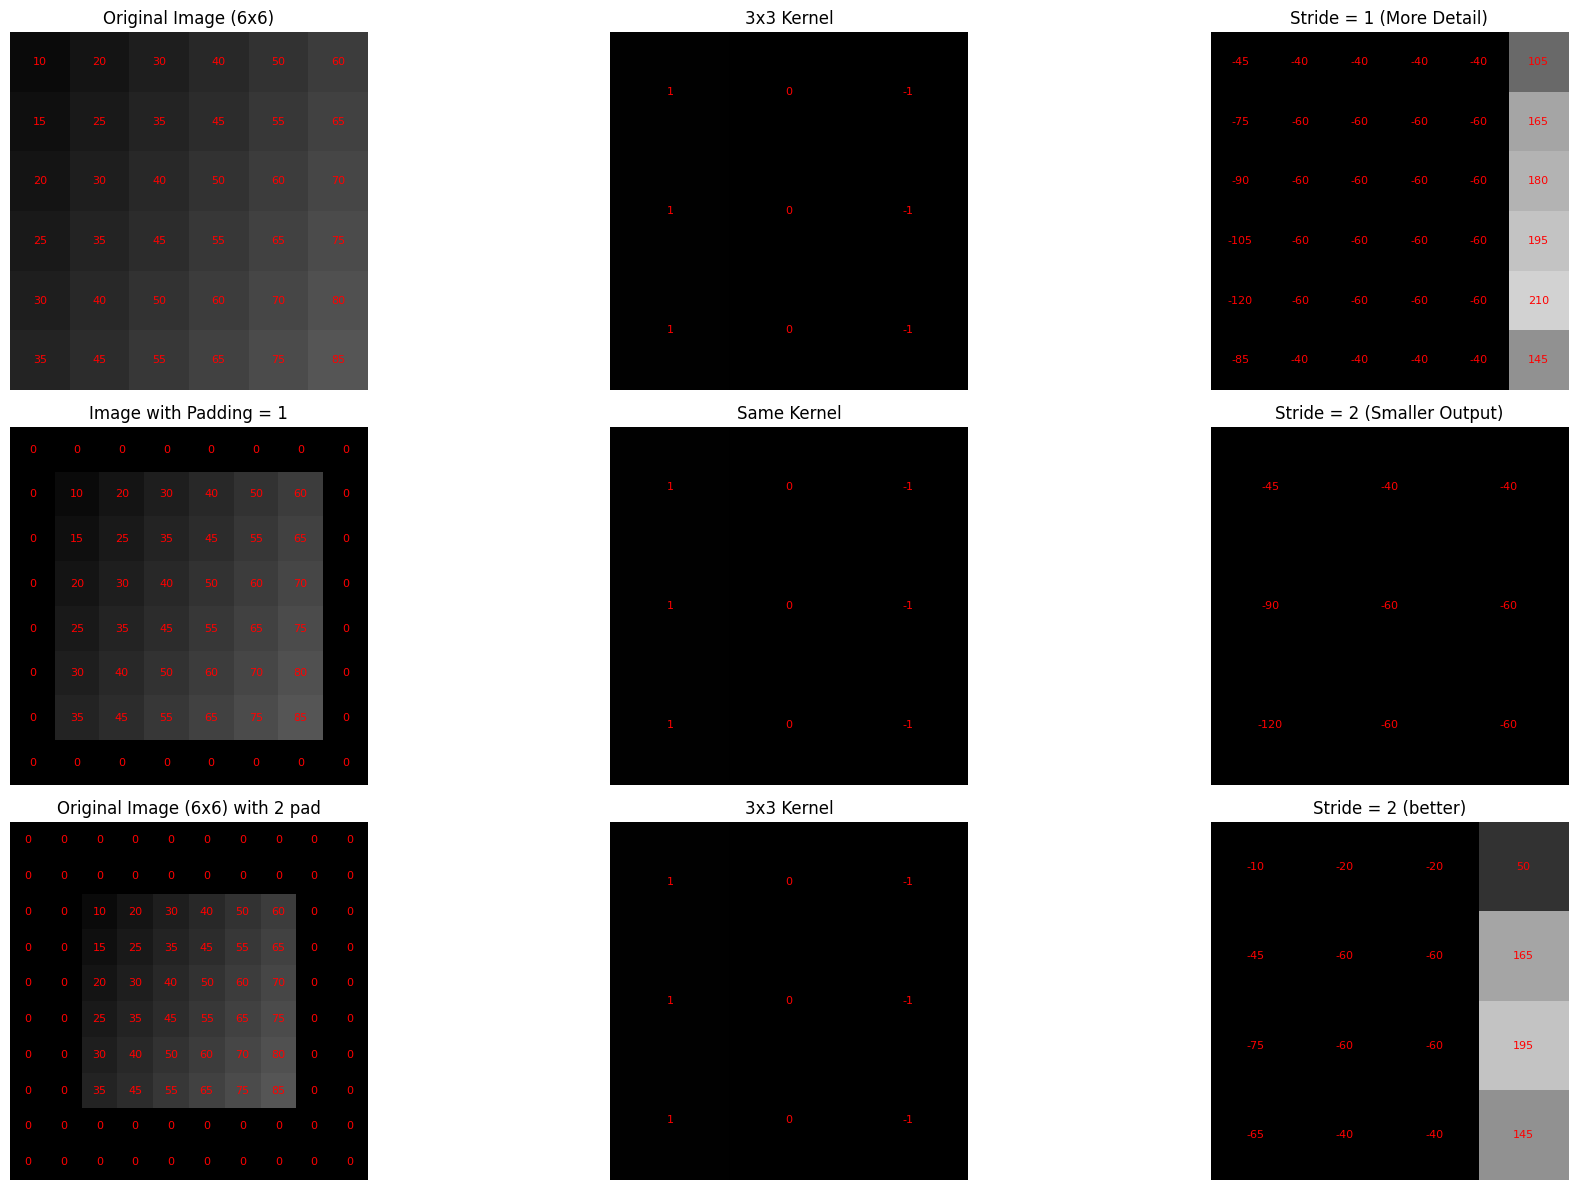

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convolve2d_stride(image, kernel, padding=0, stride=1):
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    i_h, i_w = image.shape
    k_h, k_w = kernel.shape

    o_h = (i_h - k_h) // stride + 1
    o_w = (i_w - k_w) // stride + 1

    output = np.zeros((o_h, o_w))

    for i in range(o_h):
        for j in range(o_w):
            region = image[i*stride:i*stride+k_h, j*stride:j*stride+k_w]
            output[i, j] = np.sum(region * kernel)

    return image, output

def plot_matrix(ax, mat, title):
    ax.imshow(mat, cmap='gray', vmin=0, vmax=255)
    for (i, j), val in np.ndenumerate(mat):
        ax.text(j, i, f'{int(val)}', ha='center', va='center', color='red', fontsize=8)
    ax.set_title(title)
    ax.axis('off')

# 🎯 Input image (6x6)
image = np.array([
    [10, 20, 30, 40, 50, 60],
    [15, 25, 35, 45, 55, 65],
    [20, 30, 40, 50, 60, 70],
    [25, 35, 45, 55, 65, 75],
    [30, 40, 50, 60, 70, 80],
    [35, 45, 55, 65, 75, 85]
], dtype=np.uint8)

# 🧱 3x3 kernel (edge detector)
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# ➕ Padding = 1 for both
pad = 1

# 🧮 Convolve with stride 1 and stride 2
img_stride1, out_stride1 = convolve2d_stride(image, kernel, padding=pad, stride=1)
img_stride12, out_stride12 = convolve2d_stride(image, kernel, padding=2, stride=2)
img_stride2, out_stride2 = convolve2d_stride(image, kernel, padding=pad, stride=2)

# 📊 Plot the result
fig, axs = plt.subplots(3, 3, figsize=(20, 12))

plot_matrix(axs[0, 0], image, "Original Image (6x6)")
plot_matrix(axs[0, 1], kernel, "3x3 Kernel")
plot_matrix(axs[0, 2], out_stride1, "Stride = 1 (More Detail)")

plot_matrix(axs[1, 0], img_stride2, "Image with Padding = 1")
plot_matrix(axs[1, 1], kernel, "Same Kernel")
plot_matrix(axs[1, 2], out_stride2, "Stride = 2 (Smaller Output)")

plot_matrix(axs[2, 0], img_stride12, "Original Image (6x6) with 2 pad")
plot_matrix(axs[2, 1], kernel, "3x3 Kernel")
plot_matrix(axs[2, 2], out_stride12, "Stride = 2 (better)")



plt.tight_layout()
plt.show()


## What is Pooling in CNN?
Pooling is a downsampling operation applied to feature maps to:

Reduce spatial dimensions (width × height)

Reduce computation and overfitting

Retain important information

It works on a small window (e.g., 2×2) and slides over the input with a stride (usually 2).

### Max Pooling Layer

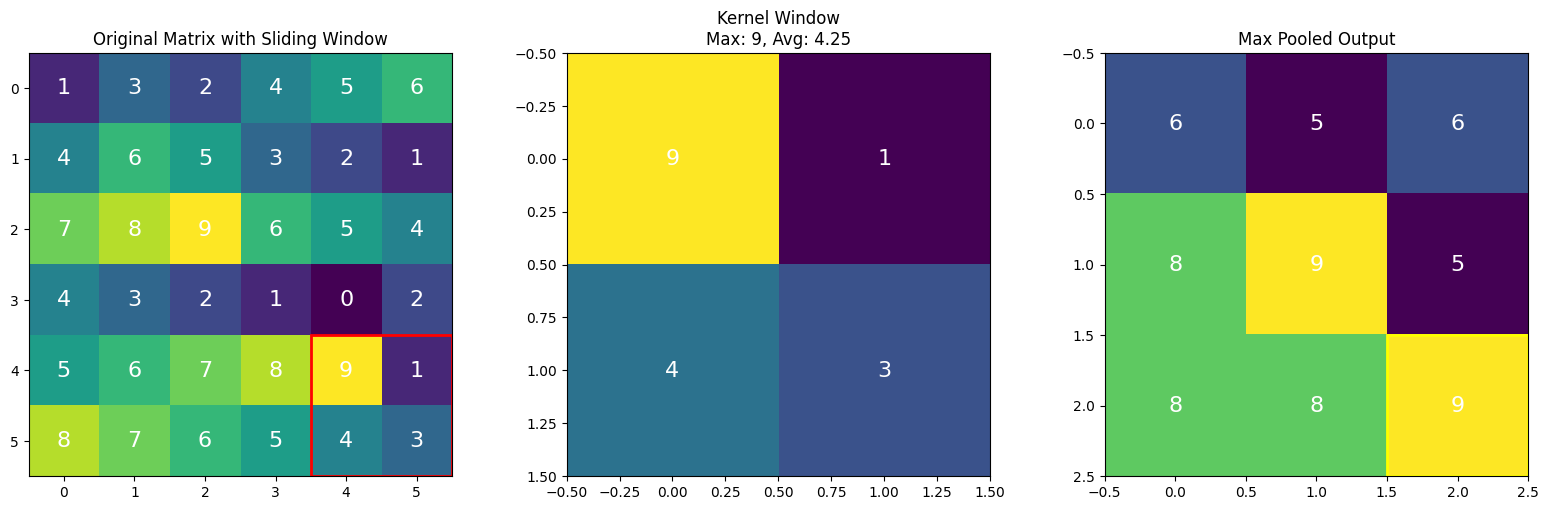

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output
import time

# Input matrix
input_matrix = np.array([
    [1, 3, 2, 4, 5, 6],
    [4, 6, 5, 3, 2, 1],
    [7, 8, 9, 6, 5, 4],
    [4, 3, 2, 1, 0, 2],
    [5, 6, 7, 8, 9, 1],
    [8, 7, 6, 5, 4, 3]
])

k = 2  # kernel size
s = 2  # stride

# Calculate pooled size
H, W = input_matrix.shape
pooled_h = (H - k) // s + 1
pooled_w = (W - k) // s + 1

max_pooled = np.zeros((pooled_h, pooled_w))
avg_pooled = np.zeros((pooled_h, pooled_w))

# Main animation loop
for i in range(pooled_h):
    for j in range(pooled_w):
        clear_output(wait=True)
        fig, axs = plt.subplots(1, 3, figsize=(16, 5))

        # Extract 2x2 window
        win = input_matrix[i*s:i*s+k, j*s:j*s+k]
        max_val = np.max(win)
        avg_val = np.mean(win)

        max_pooled[i, j] = max_val
        avg_pooled[i, j] = avg_val

        ## Panel 1: Original with kernel window highlighted
        axs[0].imshow(input_matrix)
        axs[0].set_title("Original Matrix with Sliding Window")
        for m in range(H):
            for n in range(W):
                axs[0].text(n, m, input_matrix[m, n], ha='center', va='center', color='white',fontsize=16)
        rect = patches.Rectangle((j*s - 0.5, i*s - 0.5), k, k, linewidth=2, edgecolor='red', facecolor='none')
        axs[0].add_patch(rect)
        # axs[0].grid(True)

        ## Panel 2: The current 2x2 window
        axs[1].imshow(win)
        axs[1].set_title(f"Kernel Window\nMax: {max_val}, Avg: {avg_val:.2f}")
        for m in range(k):
            for n in range(k):
                axs[1].text(n, m, win[m, n], ha='center', va='center', color='white',fontsize=16)
        # axs[1].grid(True)

        ## Panel 3: Output pooled matrix
        axs[2].imshow(max_pooled)
        axs[2].set_title("Max Pooled Output")
        for m in range(pooled_h):
            for n in range(pooled_w):
                val = max_pooled[m, n]
                if val != 0:
                    axs[2].text(n, m, int(val), ha='center', va='center', color='white',fontsize=16)
        # highlight current cell
        rect2 = patches.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=2, edgecolor='yellow', facecolor='none')
        axs[2].add_patch(rect2)
        # axs[2].grid(True)

        plt.tight_layout()
        plt.show()
        time.sleep(1)  # pause between steps


### Batch Normalization
This done during the training for the mini batch to normalize.


How does it work?
Suppose you have activations x from a layer (e.g., fully connected or convolutional).

1. Compute Mean & Variance for each feature across the batch:

$\mu = \frac{1}{m}\sum^{m}_{i=1}{x_i}, \sigma^{2}=\frac{1}{m}\sum^{m}_{i=1}{(x_i-\mu)^2}$

2. Normalize

$\hat{x_i}=\frac{x_i-\mu}{\sqrt{\sigma^{2}+\epsilon}}$

3. shift the learnable parameter

$y_i= ᵧ\hat{x_i}+ β$

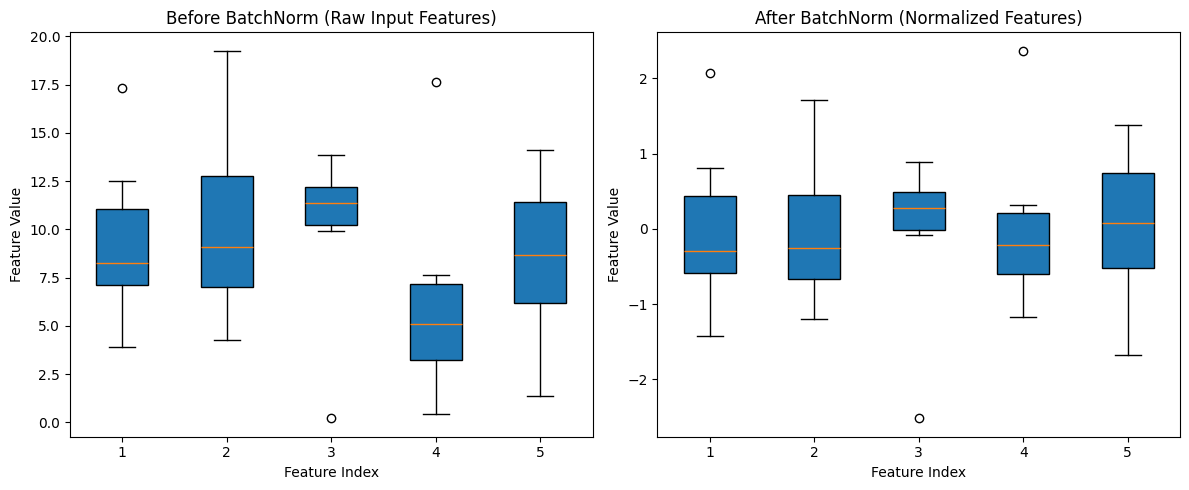

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a batch of input feature vectors (e.g., from a layer)
np.random.seed(42)
batch_size = 8
feature_dim = 5
inputs = np.random.randn(batch_size, feature_dim) * 5 + 10  # Random input, high variance

# Batch normalization: normalize across the batch for each feature
mean = np.mean(inputs, axis=0)
std = np.std(inputs, axis=0)
batchnorm_output = (inputs - mean) / std

# Plot before and after batch normalization
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Before BatchNorm
axs[0].set_title("Before BatchNorm (Raw Input Features)")
axs[0].boxplot(inputs, vert=True, patch_artist=True)
axs[0].set_xlabel("Feature Index")
axs[0].set_ylabel("Feature Value")

# After BatchNorm
axs[1].set_title("After BatchNorm (Normalized Features)")
axs[1].boxplot(batchnorm_output, vert=True, patch_artist=True)
axs[1].set_xlabel("Feature Index")
axs[1].set_ylabel("Feature Value")

plt.tight_layout()
plt.show()


### Coding for CNN

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor() # Pytorch transformation to tensor

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
train_set, val_set = torch.utils.data.random_split(train_data, [50000, 10000])

test_data  = datasets.MNIST(root='data', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 37.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.05MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 8.10MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.12MB/s]


In [3]:
train_data


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
train_loader = DataLoader(train_set, batch_size=10, shuffle=True)
val_loader   = DataLoader(val_set,   batch_size=10000, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=10000, shuffle=False)

7

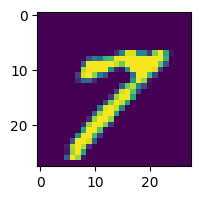

In [6]:
for images, labels in train_loader:  #taking 64 images, corresponding 64 labels
    break

images.shape #(64 images, 1 channel, height, width)
labels.shape #(class for the 64 images)

the_image = images[0]
the_image = np.transpose(the_image, (1, 2, 0))
the_image.shape
plt.figure(figsize=(2, 2))
plt.imshow(the_image) #(h, w, c)

labels[0].item()

### convolutional layers test


In [7]:
# Define layers
conv1 = nn.Conv2d(1, 6, 3, 1) # (in_channels, out_channels, kernel_size, stride)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [8]:
# Grab the first MNIST record
for i, (X_train, y_train) in enumerate(train_data):
    break

X_train.shape

torch.Size([1, 28, 28])

In [9]:
x = X_train.view(1,1,28,28)
print(x.shape)

torch.Size([1, 1, 28, 28])


In [10]:
# Perform the first convolution/activation
x = F.relu(conv1(x))
print(x.shape)

torch.Size([1, 6, 26, 26])


In [11]:
# Run the first pooling layer
x = F.max_pool2d(x, 2, 2)
print(x.shape)

torch.Size([1, 6, 13, 13])


In [12]:
# Perform the second convolution/activation
x = F.relu(conv2(x))
print(x.shape)

torch.Size([1, 16, 11, 11])


In [13]:
# Run the second pooling layer
x = F.max_pool2d(x, 2, 2)
print(x.shape)

torch.Size([1, 16, 5, 5])


In [14]:
#  Flatten the data
x = x.view(-1, 5*5*16)
print(x.shape)

torch.Size([1, 400])


In [15]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return X

In [16]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [18]:
count_parameters(model)

    54
     6
   864
    16
 48000
   120
 10080
    84
   840
    10
______
 60074


In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [24]:
import time
start_time = time.time()

epochs = 5
train_losses = []
val_losses = []
train_correct = []
val_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1

        # Apply the model
        y_pred = model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the validation batches
    with torch.no_grad():
        for b, (X_val, y_val) in enumerate(val_loader):

            # Apply the model
            yhat_val = model(X_val)

            # Tally the number of correct predictions
            predicted = torch.max(yhat_val.data, 1)[1]
            tst_corr += (predicted == y_val).sum()

    loss = criterion(yhat_val, y_val)
    val_losses.append(loss)
    val_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds')

epoch:  0  batch:  600 [  6000/60000]  loss: 0.00026733  accuracy:  99.467%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.01699896  accuracy:  99.333%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.00048601  accuracy:  99.328%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.25406861  accuracy:  99.229%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.00069026  accuracy:  99.267%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.00000581  accuracy:  99.269%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.00158068  accuracy:  99.171%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.14889346  accuracy:  99.165%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.02435125  accuracy:  99.367%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.00376777  accuracy:  99.325%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 0.01930331  accuracy:  99.289%
epoch:  1  batch: 2400 [ 24000/60000]  loss: 0.00158353  accuracy:  99.267%
epoch:  1  batch: 3000 [ 30000/60000]  loss: 0.00002677  accuracy:  99.263%
epoch:  1  b

In [25]:
train_losses = [loss.item() for loss in train_losses]
val_losses   = [loss.item() for loss in val_losses]

train_losses


[0.005976430140435696,
 0.0004676829557865858,
 0.013333022594451904,
 3.0994210646895226e-06,
 0.0003151803684886545]

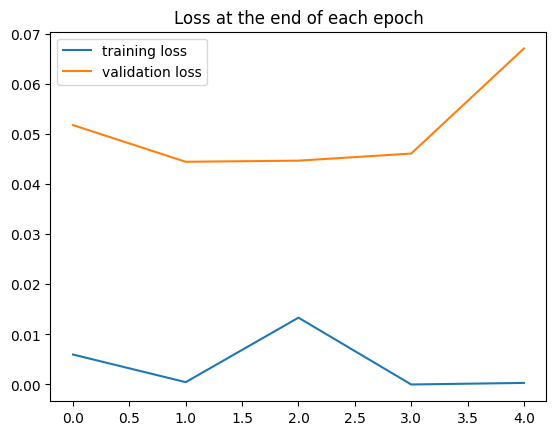

In [26]:
plt.plot(train_losses, label='training loss')
plt.plot(val_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

### Inference

In [27]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [28]:

model.eval()
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9835/10000 =  98.350%


In [29]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 972    0    1    0    1    1    4    0    2    0]
 [   0 1126    0    0    1    0    0    1    1    0]
 [   1    0 1021    0    2    0    3    5    2    0]
 [   0    1    5 1008    0   36    0    5    9    7]
 [   0    0    1    0  956    0    1    0    0    0]
 [   0    0    0    1    1  847    1    0    0    2]
 [   5    5    0    0    6    2  948    0    3    0]
 [   1    2    4    0    1    0    0 1013    0    5]
 [   1    1    0    1    3    3    1    0  951    2]
 [   0    0    0    0   11    3    0    4    6  993]]


#### Missed Images Or wrong prediction

In [30]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')

# Display the number of misses
len(misses)

165

In [31]:
# Display the first 10 index positions
misses[:10]


array([ 115,  184,  247,  321,  340,  412,  445,  495,  497,  551])

In [32]:
# Display the first 10 index positions
misses[:10]

array([ 115,  184,  247,  321,  340,  412,  445,  495,  497,  551])

In [34]:

# Set up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

In [35]:
row

Index: [ 115  184  247  321  340  412  445  495  497  551  582  583]
Label: [   4    8    4    2    5    5    6    8    4    7    8    2]
Guess: [   9    3    2    7    3    3    0    6    8    3    2    7]


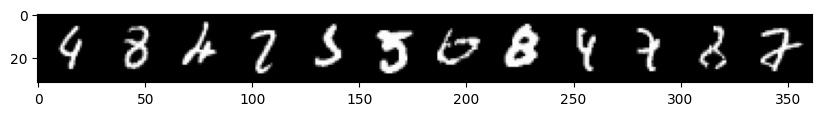

In [36]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### Single test

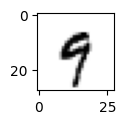

In [37]:
x = 2019
plt.figure(figsize=(1,1))
plt.imshow(test_data[x][0].reshape((28,28)), cmap="gist_yarg");

In [38]:
model.eval()
with torch.no_grad():
    new_pred = model(test_data[x][0].view(1,1,28,28)).argmax()
print("Predicted value:",new_pred.item())
# model.eval() vs torch.no_grad()
# https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615

Predicted value: 9
